In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format='retina'

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 시각화
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


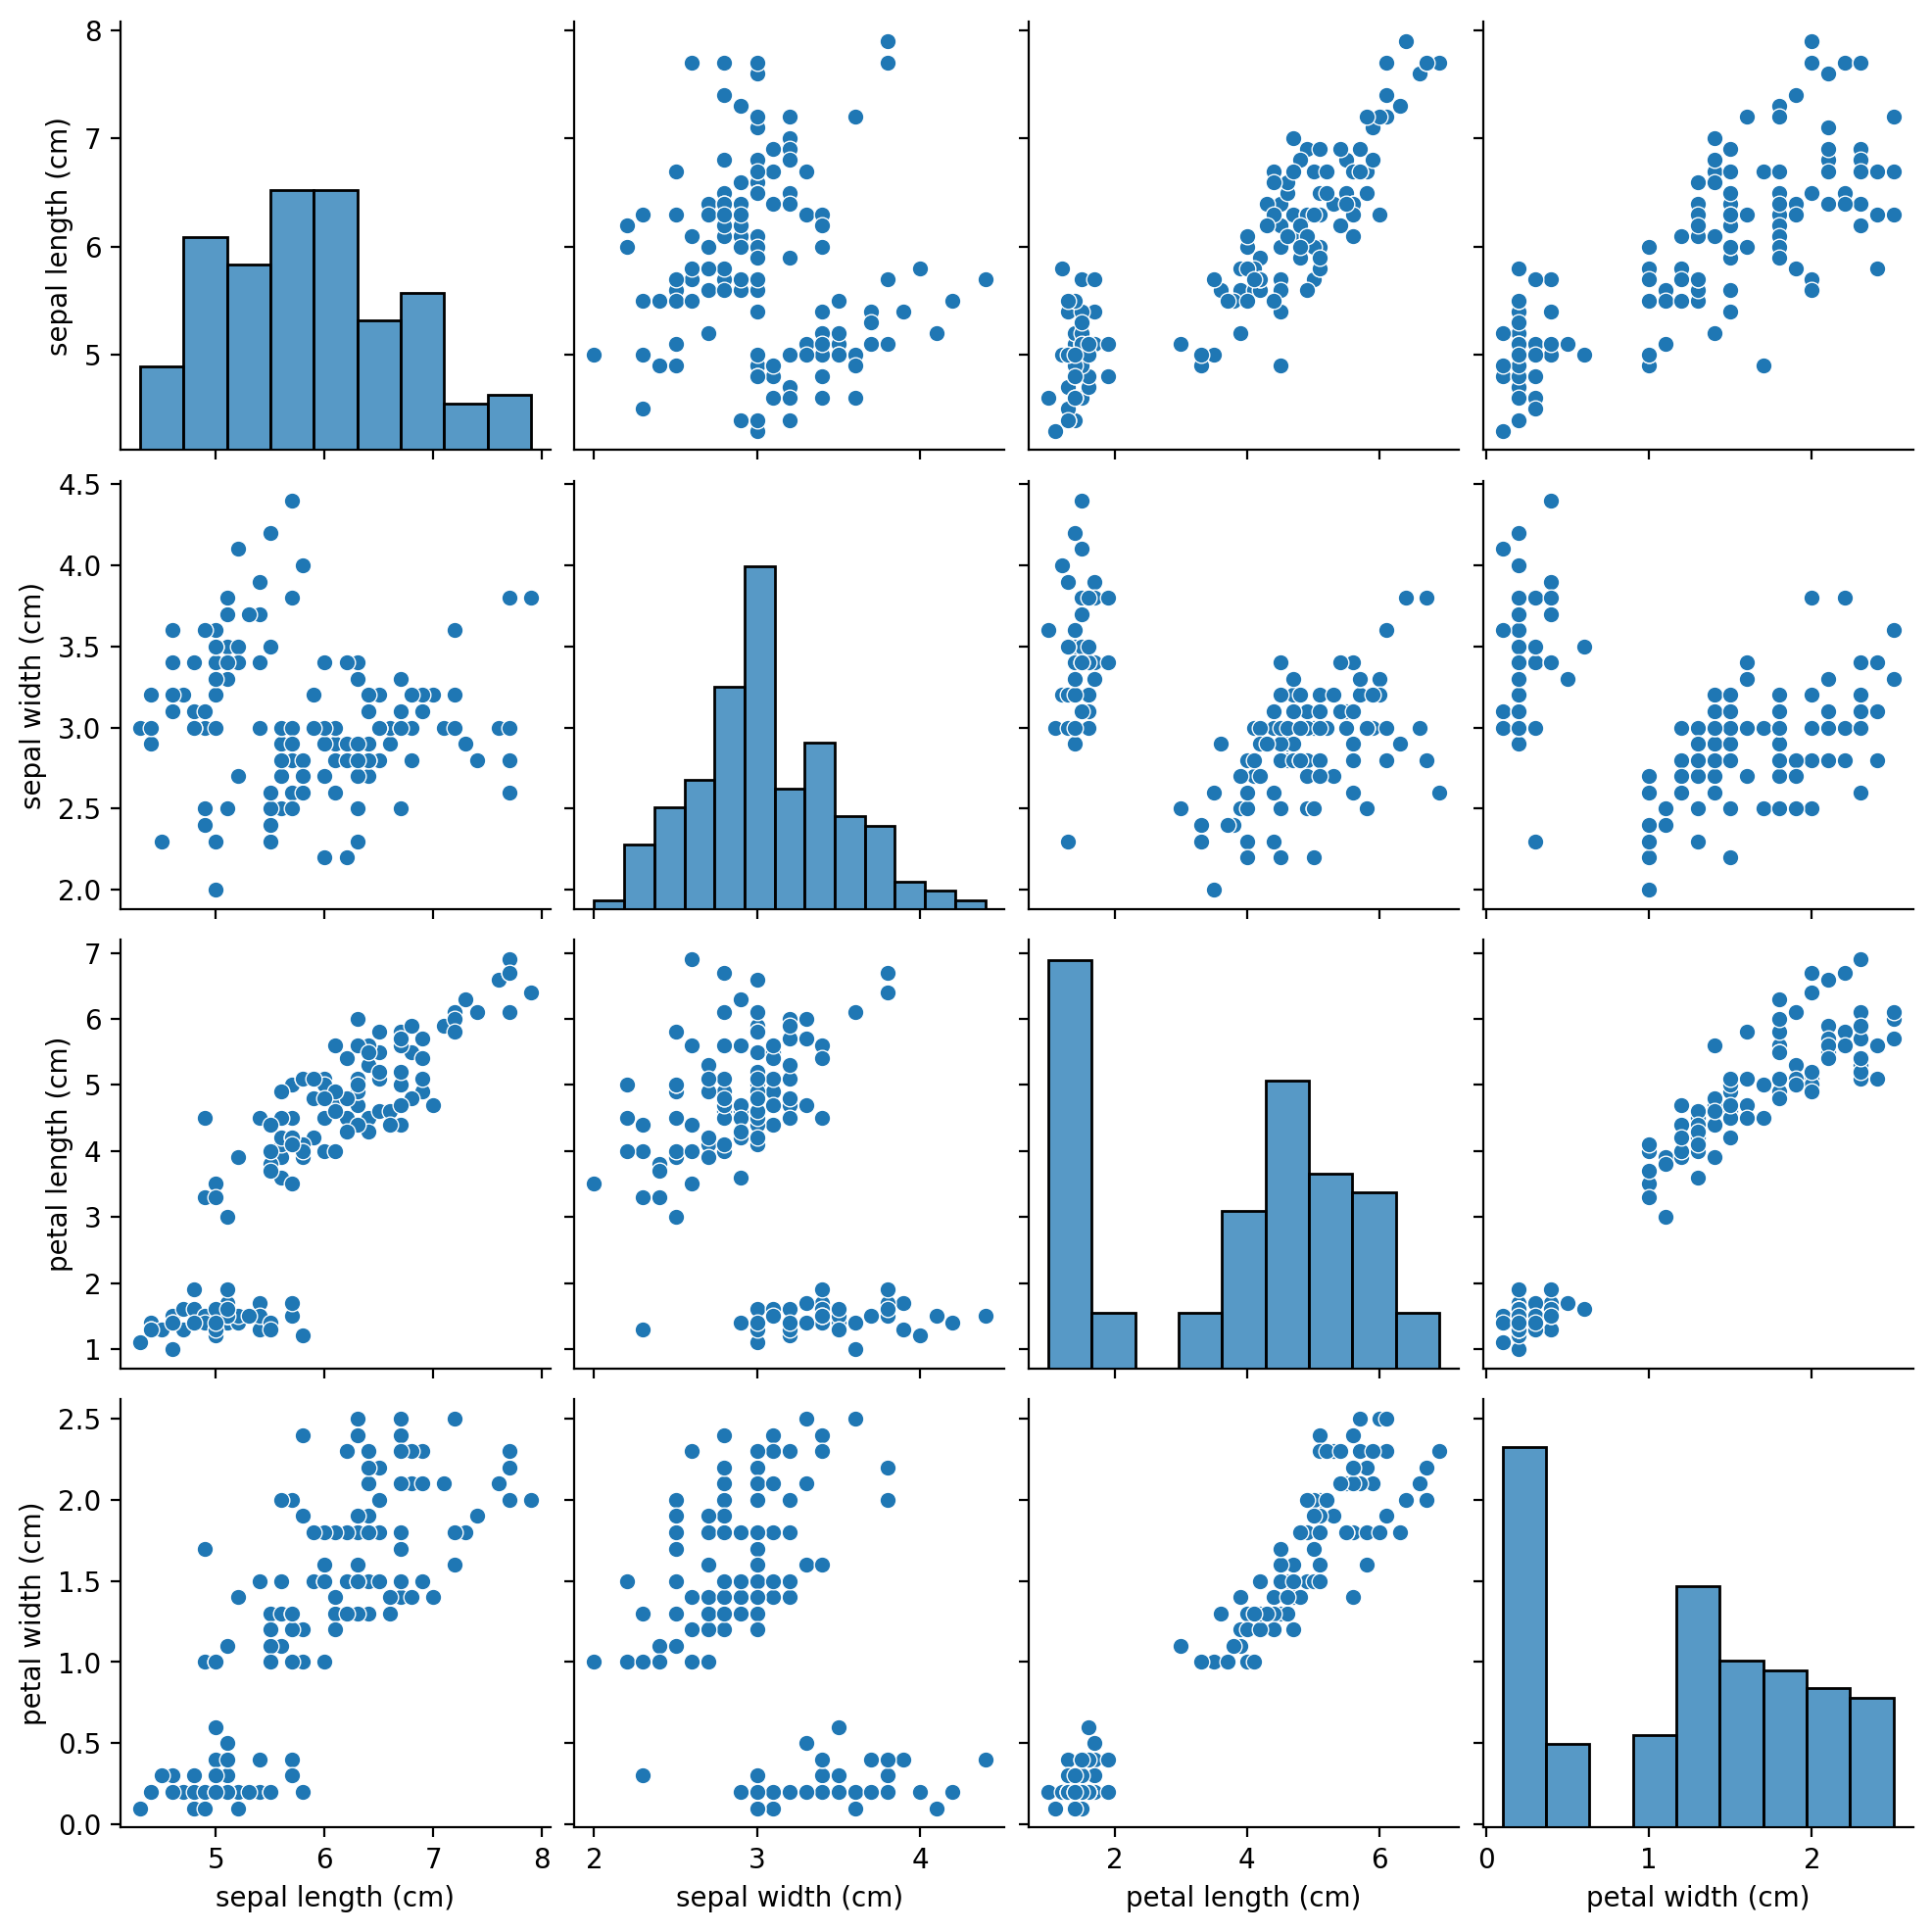

In [9]:
sns.pairplot(df)

# pip install xgboost
# 요즘에 많이 쓰는 건: 
# 랜덤포레스트가 주니어 사용에 좋다.  sklearn에 있는 것을 쓰는 것이 좋다.
# 주니어 어디든 인터넷 있는 곳 사용: xgboost, catboost

In [13]:
import xgboost as xgb

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], 
    iris['target'], 
    test_size=0.2, 
    random_state=42
)

# 테스트: random_state 같은 값으로 해야한다.
# 일반적인 상황: 데이터분석(EDA)* -> 전처리(보간) -> 학습 -> 평가(그래프 해석) [범CJ계열]: 이게 좋다(수학과, 통계학과, 자연과학과 도출 과정)
# 공과: 데이터분석(EDA) -> 전처리(보간) -> 학습 -> 평가* -> 최적화*(평가 필요없다, 정확도 중요) [스타벅스: 무료시음권 설문조사로 데이터를 돈을 주고 삼]: 적당한 수준에서 결과를 빠르게 내야 할때
#                        | 여기서부터 sklearn
# 전처리보간은 데이터분석 때의 전처리와 다르다

In [12]:
from sklearn.pipeline import Pipeline

In [14]:
# random_state 나중에는 빼야 한다

pipe_lr = Pipeline(
[('scaler', StandardScaler()), ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline(
[('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state=42))]) 

pipe_et = Pipeline(
[('scaler', StandardScaler()), ('clf', ExtraTreesClassifier(random_state=42))]) 

pipe_svmknn = Pipeline(
[('scaler', StandardScaler()), ('clf', SVC(random_state=42))]) 


In [20]:
param_range = [1,2,3,4,5,6,7,8,9,10]
param_range_fl = [1.0, 0.5, 0.1]
grid_parals_lr = [
    {
        "clf__penalty": ['11', '12'],
        "clf__C": param_range_fl,
        "clf__solver": ["liblinear"]
    }
]

In [22]:
grid_parals_rf = [
    {
        "clf__n_estimators": [100],
        "clf__criterion": ['gini','entropy'],
        "clf__min_samples_leaf": [2, 5, 10],
        "clf__max_depth": [2,5,10],
        "clf__min_samples_split": [2,5,10]
    }
]

In [23]:
gs_rf = GridSearchCV(estimator=pipe_rf, param_grid=grid_parals_rf, scoring="accuracy", cv=5)
gs_et = GridSearchCV(estimator=pipe_et, param_grid=grid_parals_rf, scoring="accuracy", cv=5)

In [24]:
grids = [gs_rf, gs_et]
best_acc = 0
for idx, gs in enumerate(grids):
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    if accuracy_score(y_test, y_pred) > best_acc:
        bets_acc = accuracy_score(y_test, y_pred)